In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import json
import os
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

## Get mean out-domain accuracy

In [6]:
EVAL_FOLDER = "/root/TAC/data/checkpoints/tacv2_tac/evals"
filenames = os.listdir(EVAL_FOLDER)
acc = 0
acc_top5 = 0
for f in filenames:
    if "zs" in f:
        with open(os.path.join(EVAL_FOLDER, f), "r") as f:
            data = json.loads(f.read())
        acc += data["acc"]
        acc_top5 += data["acc_top5"]
print(acc/5, acc_top5/5)

0.9421670117322292 0.9954451345755693


## Different data source result

In [7]:
filename_shuffle = "/root/TAC/data/checkpoints/tacv2_tac/evals/shuffle_TAC_00.json"
filename_noshuffle = "/root/TAC/data/checkpoints/tacv2_tac/evals/noshuffle_TAC_00.json"
with open(filename_shuffle, "r") as f:
    result_shuffle = json.loads(f.read())
with open(filename_noshuffle, "r") as f:
    result_noshuffle = json.loads(f.read())
data_shuffle = result_shuffle["acc_split"]
data_noshuffle = result_noshuffle["acc_near5_split"]

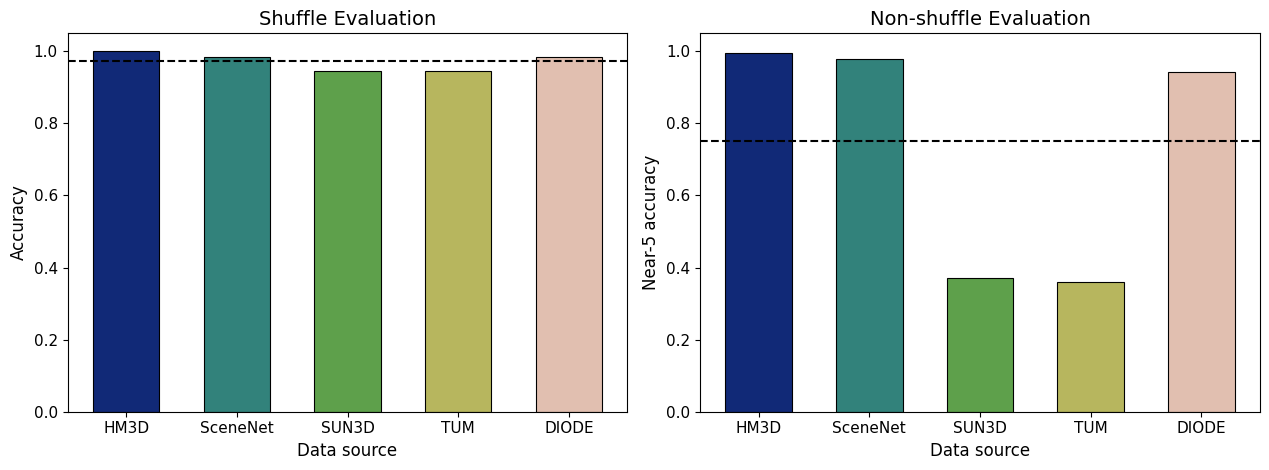

In [8]:
textx = 2
plt.figure(figsize=(12.8,4.8), dpi=100)
plt.subplot(1,2,1)
plt.bar(data_shuffle.keys(),data_shuffle.values(), width=0.6, linewidth=0.8, edgecolor="black", color=cm.gist_earth([0.1, 0.3, 0.5, 0.7, 0.9]))
plt.axhline(y=result_shuffle["acc"], color='black', linestyle='--')
# plt.text(textx,result_shuffle["acc"]+0.02,"average", fontsize=MEDIUM_SIZE, ha="center")
# plt.grid(visible=True, linewidth=0.8,linestyle='--')
plt.gca().set_axisbelow(True)
plt.xlabel("Data source", fontsize=MEDIUM_SIZE)
plt.ylabel("Accuracy", fontsize=MEDIUM_SIZE)
plt.ylim((0.0,1.05))
plt.title("Shuffle Evaluation", fontsize=BIGGER_SIZE)
plt.plot()
plt.subplot(1,2,2)
plt.bar(data_noshuffle.keys(),data_noshuffle.values(), width=0.6, linewidth=0.8, edgecolor="black", color=cm.gist_earth([0.1, 0.3, 0.5, 0.7, 0.9]))
plt.axhline(y=result_noshuffle["acc_near5"], color='black', linestyle='--')
# plt.text(textx,result_noshuffle["acc_near5"]+0.02,"average", fontsize=MEDIUM_SIZE, ha="center")
# plt.grid(visible=True, linewidth=0.8,linestyle='--')
plt.gca().set_axisbelow(True)
plt.xlabel("Data source", fontsize=MEDIUM_SIZE)
plt.ylabel("Near-5 accuracy", fontsize=MEDIUM_SIZE)
plt.ylim((0.0,1.05))
plt.title("Non-shuffle Evaluation", fontsize=BIGGER_SIZE)
plt.tight_layout()
plt.savefig("split_performance.pdf", bbox_inches='tight')
plt.show()

## Examples of episodes

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import re
import glob
def list_sort(data_path):
    return sorted(os.listdir(data_path), key=lambda f: int(re.sub(r"\D", "", f)))
num = 12
start = 0
# folders = ["/root/TAC/data/rgbd_data/hm3d_rgbd/train/19/190024","/root/TAC/data/rgbd_data/hm3d_rgbd/train/26/260967","/root/TAC/data/rgbd_data/sun3d/train/30","/root/TAC/data/rgbd_data/sun3d/train/361","/root/TAC/data/rgbd_data/scenenet_resize/train/10/10972","/root/TAC/data/rgbd_data/scenenet_resize/train/12/12035","/root/TAC/data/rgbd_data/tumrgbd_clean_resize/train/rgbd_dataset_freiburg1_room","/root/TAC/data/rgbd_data/tumrgbd_clean_resize/train/rgbd_dataset_freiburg2_360_hemisphere","/root/TAC/data/rgbd_data/diode_clean_resize/train/indoors/11","/root/TAC/data/rgbd_data/diode_clean_resize/train/indoors/40","/root/TAC/data/rgbd_data/nyuv2_resize/train"]
# names = ["\nHM3D_1","\nHM3D_2","\nSUN3D_1","\nSUN3D_2","\nSceneNet_1","\nSceneNet_2","\nTUM_1","\nTUM_2","\nDIODE_1","\nDIODE_2","\nNYUv2"]
# depth_factors = [1000,1000,8000,8000,1000,1000,5000,5000,1000,1000,1000]
folders = ["/root/TAC/data/rgbd_data/hm3d_rgbd/train/26/260967","/root/TAC/data/rgbd_data/scenenet_resize/train/10/10972","/root/TAC/data/rgbd_data/sun3d/train/361","/root/TAC/data/rgbd_data/tumrgbd_clean_resize/train/rgbd_dataset_freiburg2_360_hemisphere","/root/TAC/data/rgbd_data/diode_clean_resize/train/indoors/11","/root/TAC/data/rgbd_data/nyuv2_resize/train"]
names = ["\nHM3D","\nSceneNet","\nSUN3D","\nTUM","\nDIODE","\nNYUv2"]
depth_factors = [1000,8000,1000,5000,1000,1000]
fig = plt.figure(figsize=(4.8*num,5.8*2*len(names)),constrained_layout=True)
subfigs = fig.subfigures(nrows=len(names),ncols=1)
for i in range(len(names)):
    folder = folders[i]
    name = names[i]
    depth_factor = depth_factors[i]
    rgbs = []
    depths = []
    if len(names)>1:
        subfig = subfigs[i]
    else:
        subfig = subfigs
    subfig.suptitle(name, fontsize=54)
    if "NYU" in name:
        for filepath in glob.glob(os.path.join(folder,"*","rgb","*"))[start:start+num]:
            img = np.array(Image.open(filepath))
            rgbs.append(img)
            filepath = filepath.replace("rgb/","depth/").replace("jpg","png")
            img = np.array(Image.open(filepath))
            depths.append(img.astype(float)/depth_factor)
    else:
        for filename in list_sort(os.path.join(folder, "rgb"))[start:start+num]:
            filepath = os.path.join(folder, "rgb", filename)
            img = np.array(Image.open(filepath))
            rgbs.append(img)
            filepath = filepath.replace("rgb/","depth/").replace("jpg","png")
            img = np.array(Image.open(filepath))
            depths.append(img.astype(float)/depth_factor)
    axs = subfig.subplots(nrows=2, ncols=num)
    for j in range(num):
        axs[0][j].imshow(rgbs[j])
        axs[1][j].imshow(depths[j],cmap="gray")

        axs[0][j].set_axis_off()
        axs[1][j].set_axis_off()
    # subfig.subplots_adjust(wspace=0.05, hspace=0.05)
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig("examples.pdf", bbox_inches='tight')
plt.savefig("examples.jpg", bbox_inches='tight')
plt.savefig("examples.png", bbox_inches='tight')
plt.close()
# plt.show()


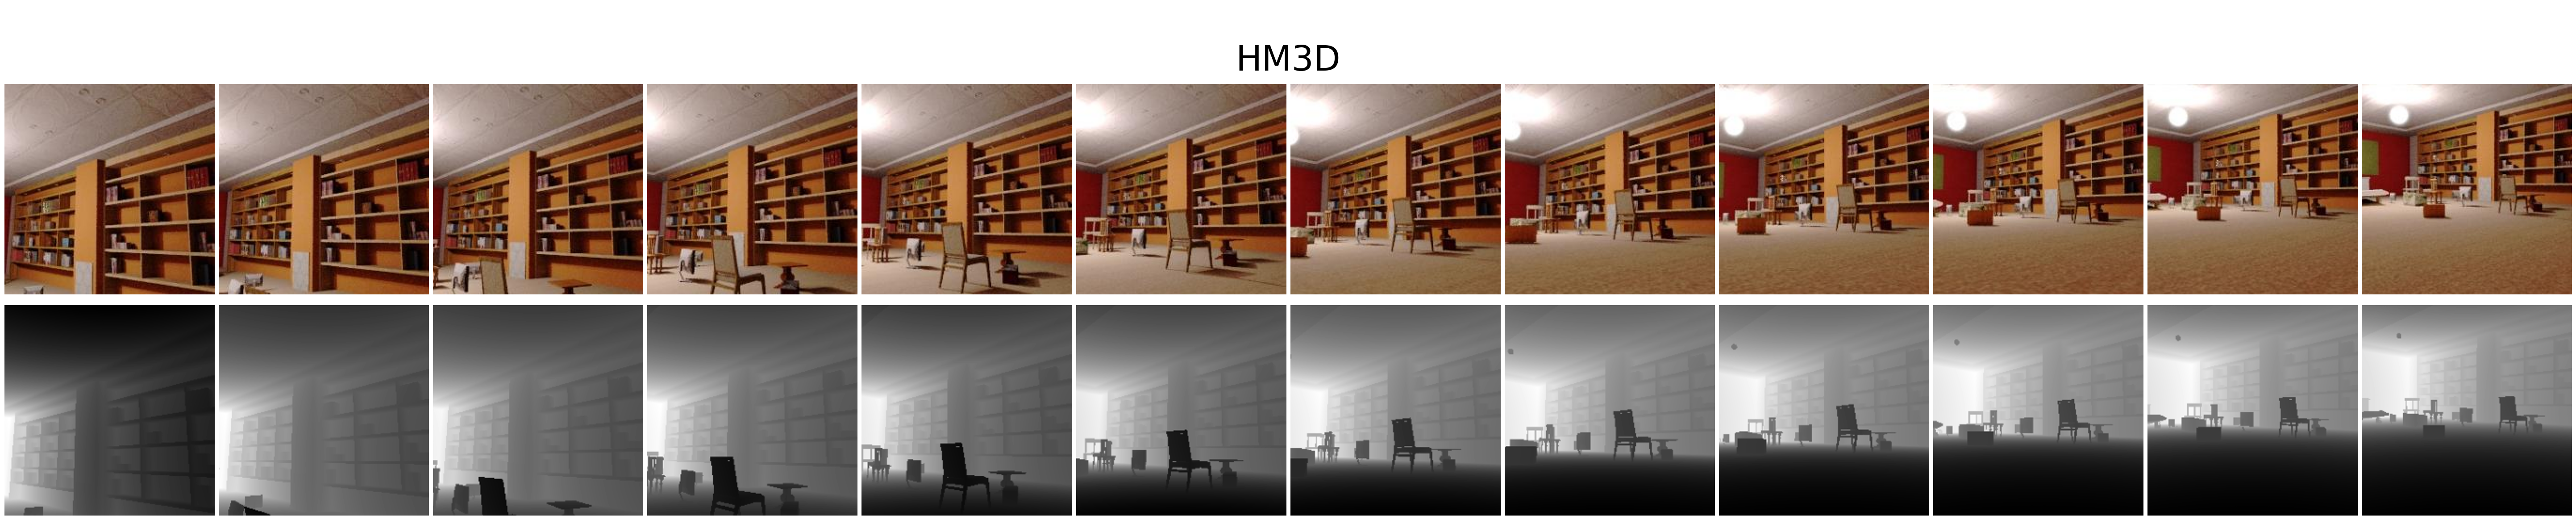

In [112]:
import os
import matplotlib.pyplot as plt
from PIL import Image

num = 12
start = 0
folders = ["/root/TAC/data/rgbd_data/scenenet_resize/train/10/10972"]
names = ["\nHM3D"]
depth_factors = [1000]
fig = plt.figure(figsize=(4.8*num,5.8*2*len(names)), constrained_layout=True)
subfigs = fig.subfigures(nrows=len(names),ncols=1)
for i in range(len(names)):
    folder = folders[i]
    name = names[i]
    depth_factor = depth_factors[i]
    rgbs = []
    depths = []
    if len(names)>1:
        subfig = subfigs[i]
    else:
        subfig = subfigs
    subfig.suptitle(name, fontsize=56)
    if "NYU" in name:
        for filepath in glob.glob(os.path.join(folder,"*","rgb","*"))[start:start+num]:
            img = np.array(Image.open(filepath))
            rgbs.append(img)
            filepath = filepath.replace("rgb/","depth/").replace("jpg","png")
            img = np.array(Image.open(filepath))
            depths.append(img.astype(float)/depth_factor)
    else:
        for filename in list_sort(os.path.join(folder, "rgb"))[start:start+num]:
            filepath = os.path.join(folder, "rgb", filename)
            img = np.array(Image.open(filepath))
            rgbs.append(img)
            filepath = filepath.replace("rgb/","depth/").replace("jpg","png")
            img = np.array(Image.open(filepath))
            depths.append(img.astype(float)/depth_factor)
    axs = subfig.subplots(nrows=2, ncols=num)
    for j in range(num):
        axs[0][j].imshow(rgbs[j])
        axs[1][j].imshow(depths[j],cmap="gray")

        axs[0][j].set_axis_off()
        axs[1][j].set_axis_off()
    # subfig.subplots_adjust(wspace=0.05, hspace=0.05)
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()


In [119]:
glob.glob(os.path.join("/root/TAC/data/rgbd_data/nyuv2_resize","*","rgb","*"))

[]